In [1]:
import pandas as pd

# CSV 파일 경로
file_path = "data/price_funding.csv"

# CSV 파일 로드
df = pd.read_csv(file_path)

df=df["price_diff"]

# 결과 확인
print(df)  # 상위 5개 출력

0      -72.47
1      -69.70
2      -82.77
3      -85.81
4      -81.50
        ...  
8755    45.51
8756    37.98
8757    44.01
8758    44.54
8759    50.85
Name: price_diff, Length: 8760, dtype: float64


In [34]:
!pip install tqdm

🔄 매도 시점 처리 중: 100%|██████████████████████████████████████████████████| 8760/8760 [00:00<00:00, 115975.20step/s]



🔍 수익 정렬 중...


📊 정렬 진행 중: 100%|█████████████████████████████████████████████████████| 8747/8747 [00:00<00:00, 4374860.13trade/s]


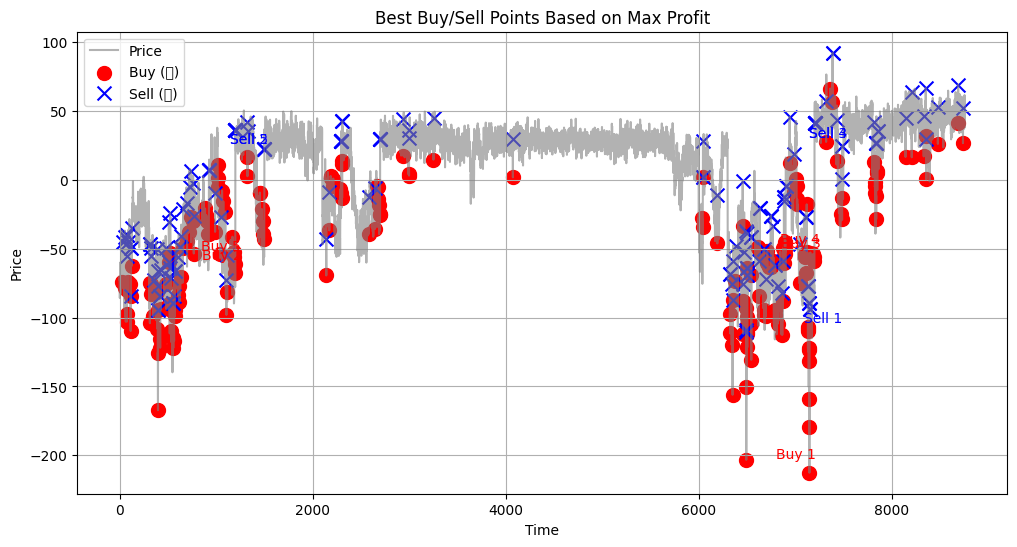

In [15]:
import pandas as pd
import heapq
import matplotlib.pyplot as plt
from tqdm import tqdm  # 진행 상태 표시

MAX_POSITIONS = 200  # 최대 20개 포지션 제한

# 우선순위 큐 (최소 힙) 사용
min_heap = []
best_trades = []

# tqdm을 사용하여 진행 상태 표시
for sell_index in tqdm(range(len(df)), desc="🔄 매도 시점 처리 중", unit="step"):
    sell_price = df.iloc[sell_index]
    
    # 현재 매도 시점까지의 모든 매수 가능 시점을 힙에 저장
    heapq.heappush(min_heap, (df.iloc[sell_index], sell_index))
    
    # 최소 힙에서 가장 낮은 매수 가격을 가져옴 (즉, 가장 수익이 큰 조합)
    while min_heap and min_heap[0][1] < sell_index:  # 매수 시점 < 매도 시점
        buy_price, buy_index = heapq.heappop(min_heap)
        profit = sell_price - buy_price
        
        if profit > 0:
            best_trades.append((buy_index, sell_index, profit))

# 수익 기준으로 정렬 (진행률 표시 추가)
print("\n🔍 수익 정렬 중...")
best_trades = sorted(
    tqdm(best_trades, desc="📊 정렬 진행 중", unit="trade"), 
    key=lambda x: x[2], 
    reverse=True
)[:MAX_POSITIONS]

# # 결과 출력
# print("\n✅ 최고 수익 매수/매도 지점:")
# for buy_idx, sell_idx, profit in tqdm(best_trades, desc="📢 결과 출력 중", unit="trade"):
#     print(f"매수 시점: {buy_idx}, 매도 시점: {sell_idx}, 예상 수익: {profit:.2f}")

# 📌 그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(df.values, label="Price", color="gray", alpha=0.6)  # 전체 가격 데이터

# 매수 (🔴) 및 매도 (🔵) 시점 표시
buy_indices = [t[0] for t in best_trades]
sell_indices = [t[1] for t in best_trades]
buy_prices = [df.iloc[i] for i in buy_indices]
sell_prices = [df.iloc[i] for i in sell_indices]

plt.scatter(buy_indices, buy_prices, color='red', label="Buy (🔴)", marker="o", s=100)
plt.scatter(sell_indices, sell_prices, color='blue', label="Sell (🔵)", marker="x", s=100)

# 주석 추가 (첫 5개만 표시)
for i in range(min(5, len(best_trades))):
    buy_idx, sell_idx, profit = best_trades[i]
    plt.annotate(f'Buy {i+1}', (buy_idx, df.iloc[buy_idx]), textcoords="offset points", xytext=(-10,10), ha='center', color='red')
    plt.annotate(f'Sell {i+1}', (sell_idx, df.iloc[sell_idx]), textcoords="offset points", xytext=(10,-10), ha='center', color='blue')

plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.title("Best Buy/Sell Points Based on Max Profit")
plt.grid()

# 📌 그래프 출력
plt.show()